In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

### Построим классификатор, определяющий "легендарность" покемона

In [4]:
# Загрузим файл и проверим, все ли с ним в порядке
data = pd.read_csv(r'C:\Users\polia\Downloads\datasets_2756_4568_pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
# Проверим, нет ли missing values
data.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [6]:
# Проверим, какие значения отсутсвтуют
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

height_m
percentage_male
weight_kg


In [9]:
# Заполним их
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())

In [10]:
data.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [13]:
# Переводим типы данных
for label,content in data.items():
    if pd.api.types.is_float_dtype(content):
        data[label] = data[label].astype('int')
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = data[label].astype('category')
for label,content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes + 1
        
data.dtypes

abilities            int16
against_bug          int32
against_dark         int32
against_dragon       int32
against_electric     int32
against_fairy        int32
against_fight        int32
against_fire         int32
against_flying       int32
against_ghost        int32
against_grass        int32
against_ground       int32
against_ice          int32
against_normal       int32
against_poison       int32
against_psychic      int32
against_rock         int32
against_steel        int32
against_water        int32
attack               int64
base_egg_steps       int64
base_happiness       int64
base_total           int64
capture_rate          int8
classfication        int16
defense              int64
experience_growth    int64
height_m             int32
hp                   int64
japanese_name        int16
name                 int16
percentage_male      int32
pokedex_number       int64
sp_attack            int64
sp_defense           int64
speed                int64
type1                 int8
t

###### Перейдем непосредственно к анализу данных

In [17]:
X = data.drop('is_legendary',axis=1)
y = data['is_legendary']

In [18]:
# Используем random forest
model_a = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_a.fit(X_train,y_train)
model_a.score(X_test,y_test)

C:\Users\polia\ananahui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [24]:
# Т.к. score высокий, остановимся на этой модели

# Теперь предскажем легендарность:
Pokemon = pd.DataFrame()
y_preds = model_a.predict(X)
Pokemon['Default values'] = y
Pokemon['Predictions'] = y_preds

In [25]:
Pokemon

,Default values,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
796,1,1
797,1,1
798,1,1
799,1,1


### Теперь ответим на вопрос - вероятность какого вида покемонов быть легендарным самая высокая?

In [26]:
import seaborn as sns

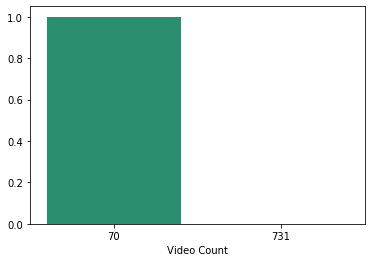

In [30]:
legendarity = data.groupby(["is_legendary"]).size().sort_values(ascending = False)
sns.barplot(legendarity.values, legendarity.index.values, palette = "Dark2")
plt.xlabel("Video Count")
plt.show()

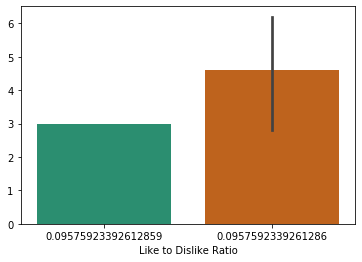

In [39]:
data["legend_ratio"] = sum(data["is_legendary"]==1) / sum(data["is_legendary"]==0) # Добавим новый параметр - отношение легендарности к не-легендарности
legend_category = data[data["is_legendary"] != 0].groupby("generation").mean().sort_values(by = "legend_ratio", ascending = False)
sns.barplot(legend_category["legend_ratio"], legend_category.index.values, palette = "Dark2")
plt.xlabel("Like to Dislike Ratio")
plt.show()